In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import pickle

In [11]:
df = pd.read_csv('/home/student/Desktop/dkakurkina/Hometask_3/data_after_3.csv')
df.head()

,A,B,mu,alpha,homo,lumo,u0,lipinskiHBD,NumRotatableBonds,NumAmideBonds,...,n7aRing,n5FRing,n6FRing,n7FRing,n8FRing,n9FaRing,GGI4,GGI5,TopoShapeIndex,gap
0,0.620166,0.234161,0.128198,0.508690,0.554353,0.856926,0.625002,0.166667,0.166667,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.745385,0.438596,0.666667,0.596362
1,0.484998,0.170089,0.083408,0.661187,0.630143,0.894118,0.618011,0.166667,0.166667,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.875385,0.000000,0.666667,0.574474
2,0.087701,0.267970,0.280996,0.586817,0.477696,0.745731,0.512052,0.500000,0.500000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.221538,0.000000,0.666667,0.563388
3,0.942149,0.243423,0.268082,0.444183,0.495886,0.565465,0.547543,0.166667,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.166154,0.219298,0.666667,0.416430
4,0.438825,0.313055,0.151055,0.411304,0.458207,0.538899,0.522597,0.166667,0.166667,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.519231,0.000000,1.000000,0.421262


# Для уменьшения размерности будем использовать линейный метод PCA и нелинейный KPCA

Метод PCA

In [12]:
pca = PCA()
pca = pca.fit(df.iloc[:, :])
pcs = pca.transform(df.iloc[:, :])

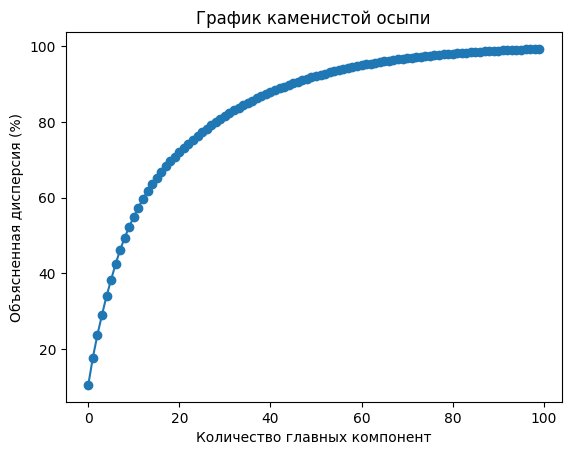

In [13]:
# Построим график каменистой осыпи
explained_variance_ratio_pca = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_variance_ratio_pca[:100]) * 100, marker='o', linestyle='-')
plt.xlabel('Количество главных компонент')
plt.ylabel('Объясненная дисперсия (%)')
plt.title('График каменистой осыпи')
plt.show()

In [14]:
# Разделим датафрейм на тестовую и обучающую выборки
X = df.drop('gap', axis=1)
X = X.select_dtypes(exclude=['object'])
y = df['gap']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [15]:
# Вычислим оптимальное кол-во компонент
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio_pca)

# Найдем количество компонент, которые объясняют, например, 95% дисперсии
n_components = np.argmax(cumulative_explained_variance_ratio >= 0.95) + 1

print(f"Оптимальное количество компонент для объяснения 95% дисперсии: {n_components}")

Оптимальное количество компонент для объяснения 95% дисперсии: 62


In [16]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

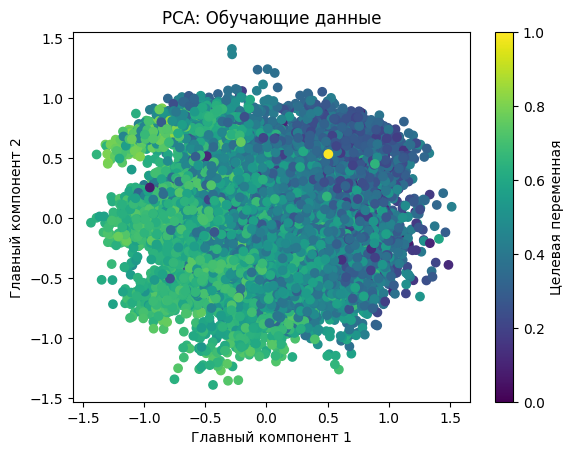

In [17]:
# Визуализируем данные
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Главный компонент 1')
plt.ylabel('Главный компонент 2')
plt.title('PCA: Обучающие данные')
plt.colorbar(label='Целевая переменная')
plt.show()

Метод KPCA

In [9]:
kpca = KernelPCA()
kpca = kpca.fit_transform(df.iloc[:, :])

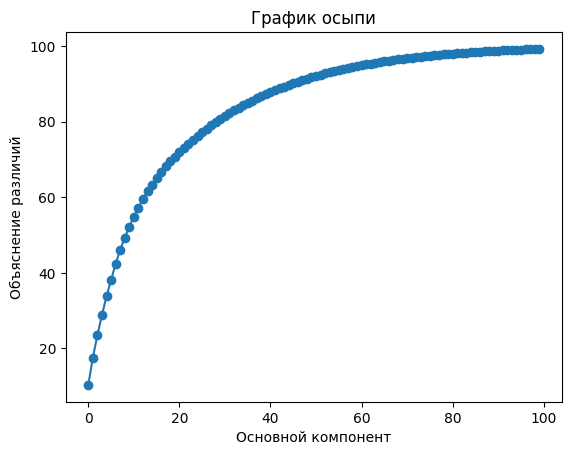

In [18]:
# Построение графика каменистой осыпи
explained_variance = np.var(kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

# Строим график каменистой осыпи
plt.plot(np.cumsum(explained_variance_ratio[:100]) * 100, marker='o', linestyle='-')
plt.title('График осыпи')
plt.xlabel('Основной компонент')
plt.ylabel('Объяснение различий')
plt.show()

In [20]:
kpca = KernelPCA(n_components=n_components)
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

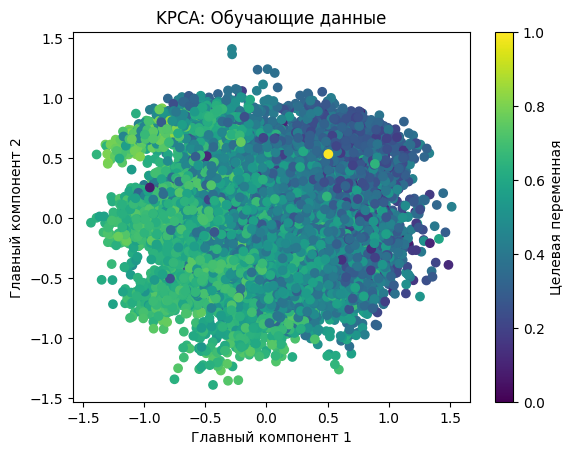

In [21]:
#Визуализируем данные
plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Главный компонент 1')
plt.ylabel('Главный компонент 2')
plt.title('KPCA: Обучающие данные')
plt.colorbar(label='Целевая переменная')
plt.show()

In [22]:
kpca = KernelPCA(n_components=n_components)
kpca_data = kpca.fit_transform(df.iloc[:, :])
kpca_data = pd.DataFrame(kpca_data)
kpca_data.to_csv('data_after_4_kpca.csv', index=False)

pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(df.iloc[:, :])
pca_data = pd.DataFrame(pca_data)
pca_data.to_csv('data_after_4_pca.csv', index=False)

Я выбрала 62 компоненты, потому что, согласно расчетам, это оптимальное кол-во для объяснения 95% дисперсии